In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


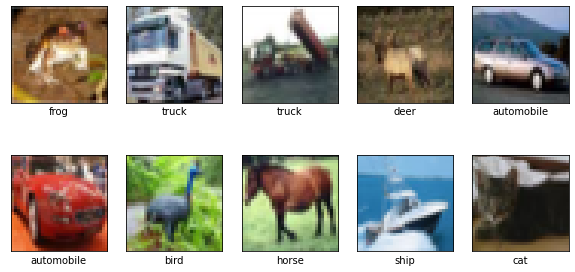

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    # plot styling; not super important
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [5]:
FILTER_SIZE = (3, 3)
POOL_SIZE = (2, 2)

model = models.Sequential()
model.add(layers.Conv2D(32, FILTER_SIZE, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(POOL_SIZE))
model.add(layers.Conv2D(64, FILTER_SIZE, activation='relu'))
model.add(layers.MaxPooling2D(POOL_SIZE))
model.add(layers.Conv2D(64, FILTER_SIZE, activation='relu'))

In [6]:
NUM_CLASSES = 10
NUM_NEURONS = 64

model.add(layers.Flatten())
model.add(layers.Dense(NUM_NEURONS, activation='relu'))
model.add(layers.Dense(NUM_CLASSES))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
model.compile(optimizer='ADAM',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5193 - accuracy: 0.4433 - val_loss: 1.2687 - val_accuracy: 0.5433
Epoch 2/3
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1493 - accuracy: 0.5929 - val_loss: 1.0557 - val_accuracy: 0.6262
Epoch 3/3
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9956 - accuracy: 0.6491 - val_loss: 0.9697 - val_accuracy: 0.6600


313/313 - 1s - loss: 0.9697 - accuracy: 0.6600


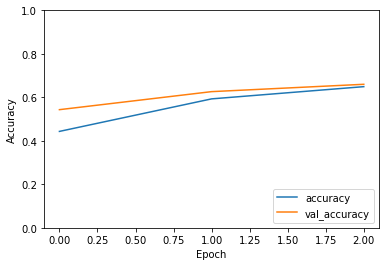

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
from PIL import Image       # Image objects
import requests             # HTTP requests
from io import BytesIO      # Byte streams
import numpy as np          # Matrix operations, numpy arrays are common input types

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])   # add a SoftMax layer ontop of our CNN

def classify_online_image(img_url):
  'Retrieve image'
  response = requests.get(img_url)                  # request the image from url
  img = Image.open(BytesIO(response.content))       # convert bytes to image (that we can see)

  'Preprocess image for TensorFlow'
  img = img.resize((32, 32))
  data = np.array(img)                              # convert image (we can see) to image (computer can see)
  data = data.reshape(1, 32, 32, 3)                 # model needs a 4D matrix (one dimension is the images, remaining 3 dimensions are the pixel matrix)

  'Make a prediction'
  probabilities = probability_model.predict(data)
  class_idx = np.argmax(probabilities)
  print(class_names[class_idx])

In [12]:
classify_online_image("https://i1.wp.com/www.denverpost.com/wp-content/uploads/2017/10/5203536.jpg?w=620&crop=0%2C0px%2C100%2C9999px")

horse
